In [1]:
import java.io.File
import javax.imageio.ImageIO

val showImages = false
fun show(name: String) {
    if (showImages) DISPLAY(ImageIO.read(File("../images/$name")))
}

In [2]:
show("ForestWalkIntro.jpg")

# Overview

Why this topic? Why this tool?

# Detour

Forest Walks take a detour. I can write, I can have images, I can code but can I draw?

In [3]:
show("detour.jpg")


# Benoît and the Beast


In [4]:
show("BenoitAndBeast.jpg")

In [5]:
%use lib-ext(0.12.0-93)
LATEX(
    """
\Huge
z_{n+1} = z_n^2 + c
"""
)

🪨 a complex number c is a member of the [Mandelbrot](https://en.wikipedia.org/wiki/Mandelbrot_set#cite_note-13) set if, when starting with z0 = 0 and applying the iteration repeatedly, the absolute value of zn remains bounded for all n>0
  ![Mandelbrot](https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Mandel_zoom_00_mandelbrot_set.jpg/480px-Mandel_zoom_00_mandelbrot_set.jpg) 
  
  ![Mandelbrot seahorse valley](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Mandel_zoom_01_head_and_shoulder.jpg/480px-Mandel_zoom_01_head_and_shoulder.jpg)
  
  ![Mandelbrot seahorse antenna](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Mandel_zoom_08_satellite_antenna.jpg/480px-Mandel_zoom_08_satellite_antenna.jpg)
   


# Aristid Lindenmayer



In [6]:
show("AristidAndDictionary.jpg")

In [7]:
import net.maiatoday.forestwalk.lsystem.plant

val p = plant {
    seed = "🪨"
    rules = mapOf(
        "🪨" to "🪨🌱",
        "🌱🌱🌱🌱" to "🌲🌱🪨🪨",
        "🌱🌲🌱" to "🌳",
        "🪨🪨🪨" to "🐿️"
    )
   // grow(13)
    sprout(13, listOf(1.0, 1.0, 1.0, 0.5))
}
p.bluePrint

🪨🌱🌱🌱🌳🪨🌲🌱🪨🪨🪨🌲🌱🪨🪨🌳🪨🌲🌱🪨🪨🌳🪨🌳🪨🌱🪨🌱🪨🌳🪨🌱🪨🌱🪨🌲🌱🪨🪨🌳🪨🌳🪨🌱🪨🌱🪨🌳🪨🌱🪨🌱

In [8]:
show("TurtleTerrapinTortoise.jpg")

---

## Turtle Tortoise Terrapin
Turtles [vs](https://www.diffen.com/difference/Tortoise_vs_Turtle) Tortoises [vs](https://africageographic.com/stories/whats-the-difference-between-turtles-tortoises-and-terrapins/) Terrapins


## Some examples

| Seed | Rules                       | Angle | Iterations |
|------|-----------------------------|-------|------------|
| `F`  | `F→F[+F]F[-F]F`             | 25.7  | 5          |
| `F`  | `F →F[+F]F[-F][F]`          | 20    | 5          |
| `F`  | `F→FF-[-F+F+F]+[+F-F-F]`    | 22.5  | 4          |
| `X`  | `X →F[+X]F[-X]+X F →FF`     | 20    | 7          |
| `X`  | `X→F[+X][-X]FX F→FF`        | 25.7  | 7          |
| `X`  | `X→F-[[X]+X]+F[+FX]-X F→FF` | 22.5  | 5          |


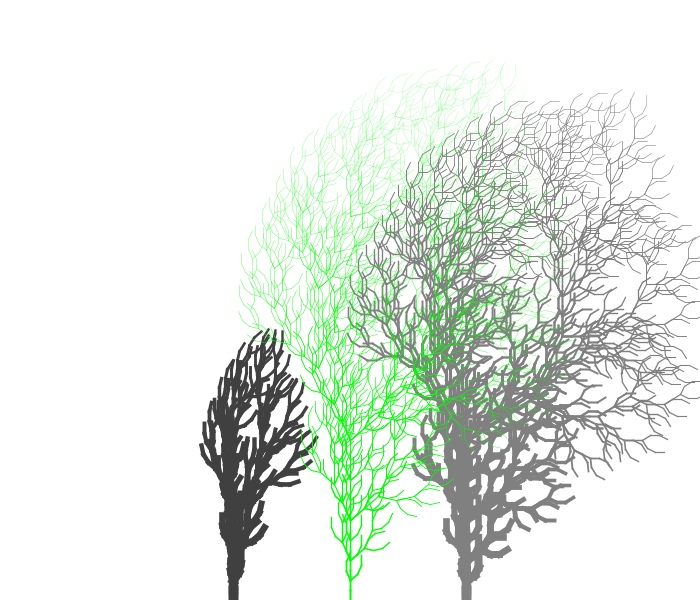

In [9]:
import net.maiatoday.forestwalk.lsystem.goTortoise
import net.maiatoday.forestwalk.lsystem.plant
import net.maiatoday.forestwalk.tools.canvas
import java.awt.Color

val p1 = plant {
    seed = "F"
    rules = mapOf(
//        "F" to "F[+F]F[-F]F" 
//            "F" to "F[+F]F[-F][F]"
        "F" to "FF-[-F+F+F]+[+F-F-F]"
//        "X" to "F[+X]F[-X]+X",
//        "F" to "FF"
    )
    grow(4)
}

val p2 = plant {
    seed = "F"
    rules = mapOf(
        "F" to "FF-[-F+F+F]+[+F-F-F]"
    )
    sprout(4, listOf(0.7))
}

canvas(700, 600) { width, height ->

    goTortoise(
        startX = width / 3,
        startY = height,
        angleChangeDeg = 17.0,
        length = 10,
        bluePrint = p2.bluePrint,
        penColors = listOf(Color.DARK_GRAY)
    )
    goTortoise(
        startX = 2 * width / 3,
        startY = height,
        angleChangeDeg = 29.0,
        length = 10,
        bluePrint = p1.bluePrint,
        penColors = listOf(Color.GRAY)
    )
    goTortoise(
        startX = width / 2,
        startY = height,
        angleChangeDeg = 25.5,
        length = 10,
        startWidth = 2.0f,
        bluePrint = p1.bluePrint
    )
}

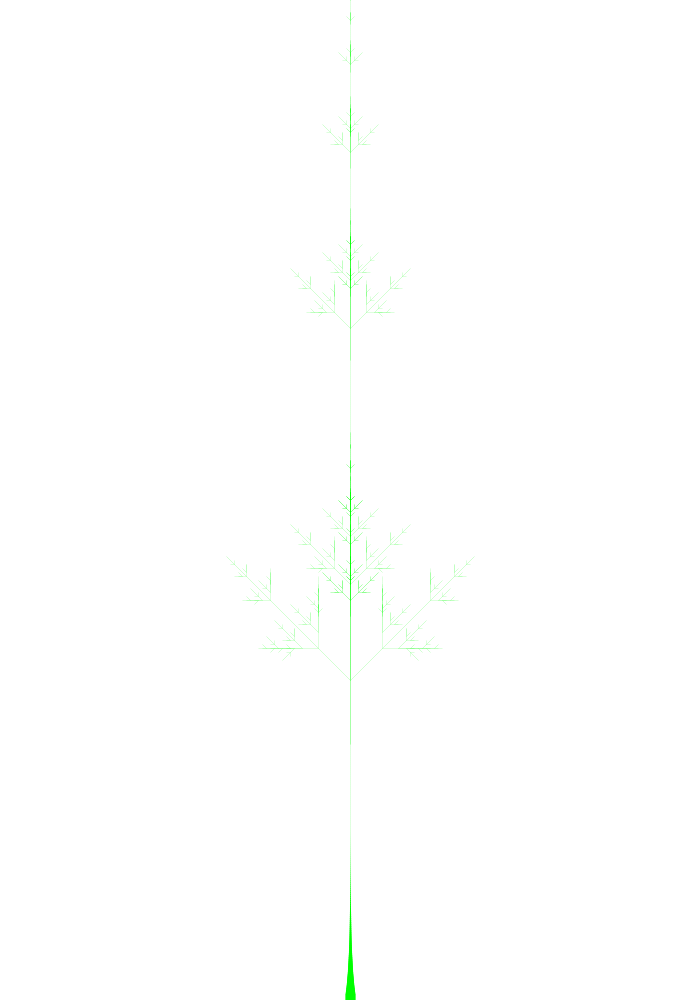

In [10]:
import net.maiatoday.forestwalk.lsystem.goTortoise
import net.maiatoday.forestwalk.lsystem.plant
import net.maiatoday.forestwalk.tools.canvas
import java.awt.Color

val p3 = plant {
    seed = "X"
    rules = mapOf(
        "X" to "F[+X][-X]FX",
        "F" to "FF"
    )
    grow(7)
}

canvas(700, 1000) { width, height ->
    goTortoise(
        startX = width / 2,
        startY = height,
        angleChangeDeg = 25.7,
        length = 2,
        bluePrint = p3.bluePrint
    )
}


## Stochastic Squirrel


In [11]:
show("StochasticSquirrel.jpg")

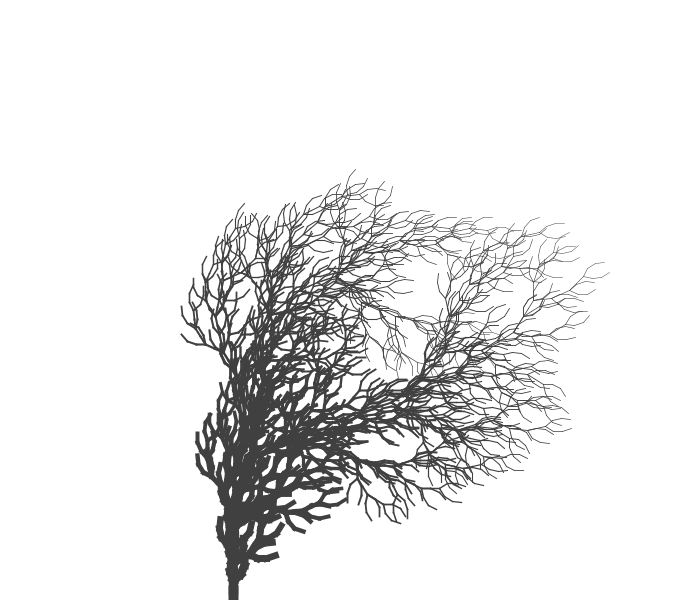

In [151]:
import net.maiatoday.forestwalk.lsystem.goSquirrel
import net.maiatoday.forestwalk.lsystem.goTortoise
import net.maiatoday.forestwalk.lsystem.plant
import net.maiatoday.forestwalk.tools.canvas
import java.awt.Color

val p = plant {
    seed = "F"
    rules = mapOf(
//        "F" to "F[+F]F[-F]F" 
//            "F" to "F[+F]F[-F][F]"
        "F" to "FF-[-F+F+F]+[+F-F-F]"
//        "X" to "F[+X]F[-X]+X",
//        "F" to "FF"
    )
    grow(4)
}

canvas(700, 600) { width, height ->

    goSquirrel(
        startX = width / 3,
        startY = height,
        angleChangeDeg = 25.0,
        length = 10,
        bluePrint = p.bluePrint,
        penColors = listOf(Color.DARK_GRAY)
    )
}



## Seedlings to Forest


In [12]:
show("seedlings.jpg")


## Share

In [13]:
show("ForestWalkShare.jpg")